# Analysis on Enzymes for Flux Split Sensitivity
## Import packages

In [1]:
import os

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sympy as sym
from mass import Simulation, strip_time
from mass.enzyme_modules import EnzymeModuleForm
from mass.io.json import load_json_model

## Import functions to facilitate case study

In [2]:
from analysis_functions import (
    load_all_models_for_growth_condition_analysis, group_PFK1, create_figures_for_export, save_figure,
    create_all_enzyme_gibbs_energy_figure)

## Set analysis options

In [3]:
# Growth mediums of interest
mediums = [
    "Glucose",
    "Pyruvate",
]
# Flux split percentages of interest
split_percentages = [0.99, 0.75, 0.50, 0.25, 0.01]
# Colors for plotting
colors = ["xkcd:red", "xkcd:orange", "xkcd:green", "xkcd:blue", "xkcd:purple"]

enzyme_ids = [
    'PGI',
    'PFK1',
    'PFK2',
    'FBP1',
    'FBP2',
    'FBA1',
    'FBA2',
    'TPI',
    'GAPD',
    'PGK',
    'PGMd',
    'PGMi',
    'ENO',
    'PYK1',
    'PYK2',
    'PPS',
    'LDH_D',
]
n_models = "all"

# Whether to look at individual growth conditions the figure
individual = True

# Whether to compare two growth conditions the figure
differential = False

# Whether to include a gibbs energy plot with the fractional abundance figures
# If False, a seperate plot is made.
include_gibbs = False

# Whether to save the figure and if so, as an SVG and/or PDF
save_figures = False

svg = False
pdf = True

# Type of figure
if include_gibbs:
    # Type of figure
    fig_type = "isozyme_flux_split_sensitivity_w_gibbs"
else:
    fig_type = "isozyme_flux_split_sensitivity"

## Load Data
### Load models
Note: Models are put into steady state from construction notebook

In [4]:
model_dicts = {}
for medium in mediums:
    model_dicts[medium] = load_all_models_for_growth_condition_analysis(
        n_models=n_models, model_dir="../data", medium=medium,
        isozyme_split_percentages=split_percentages)
    
num_models_check = np.array([
    [len(models) for models in percentage_dicts.values()]
    for percentage_dicts in model_dicts.values()]
).flatten()
if not np.all(num_models_check == num_models_check[0]):
    print("Not all conditions are equal in number of models.")

Using license file /Users/zhaiman/opt/licenses/gurobi.lic
Academic license - for non-commercial use only


### Load equilibrium constants as DataFrame

In [5]:
# Load equilibrium constants
Keq_df = pd.read_excel(
    io=os.path.abspath(
        os.path.join("../data", "model_creation_data.xlsx")),
    sheet_name="Equilibrium Constants",
    index_col=0).drop("Reference", axis=1)

## Create All Figures

### Gibbs Free Energy for all enzyme catalyzed reactions

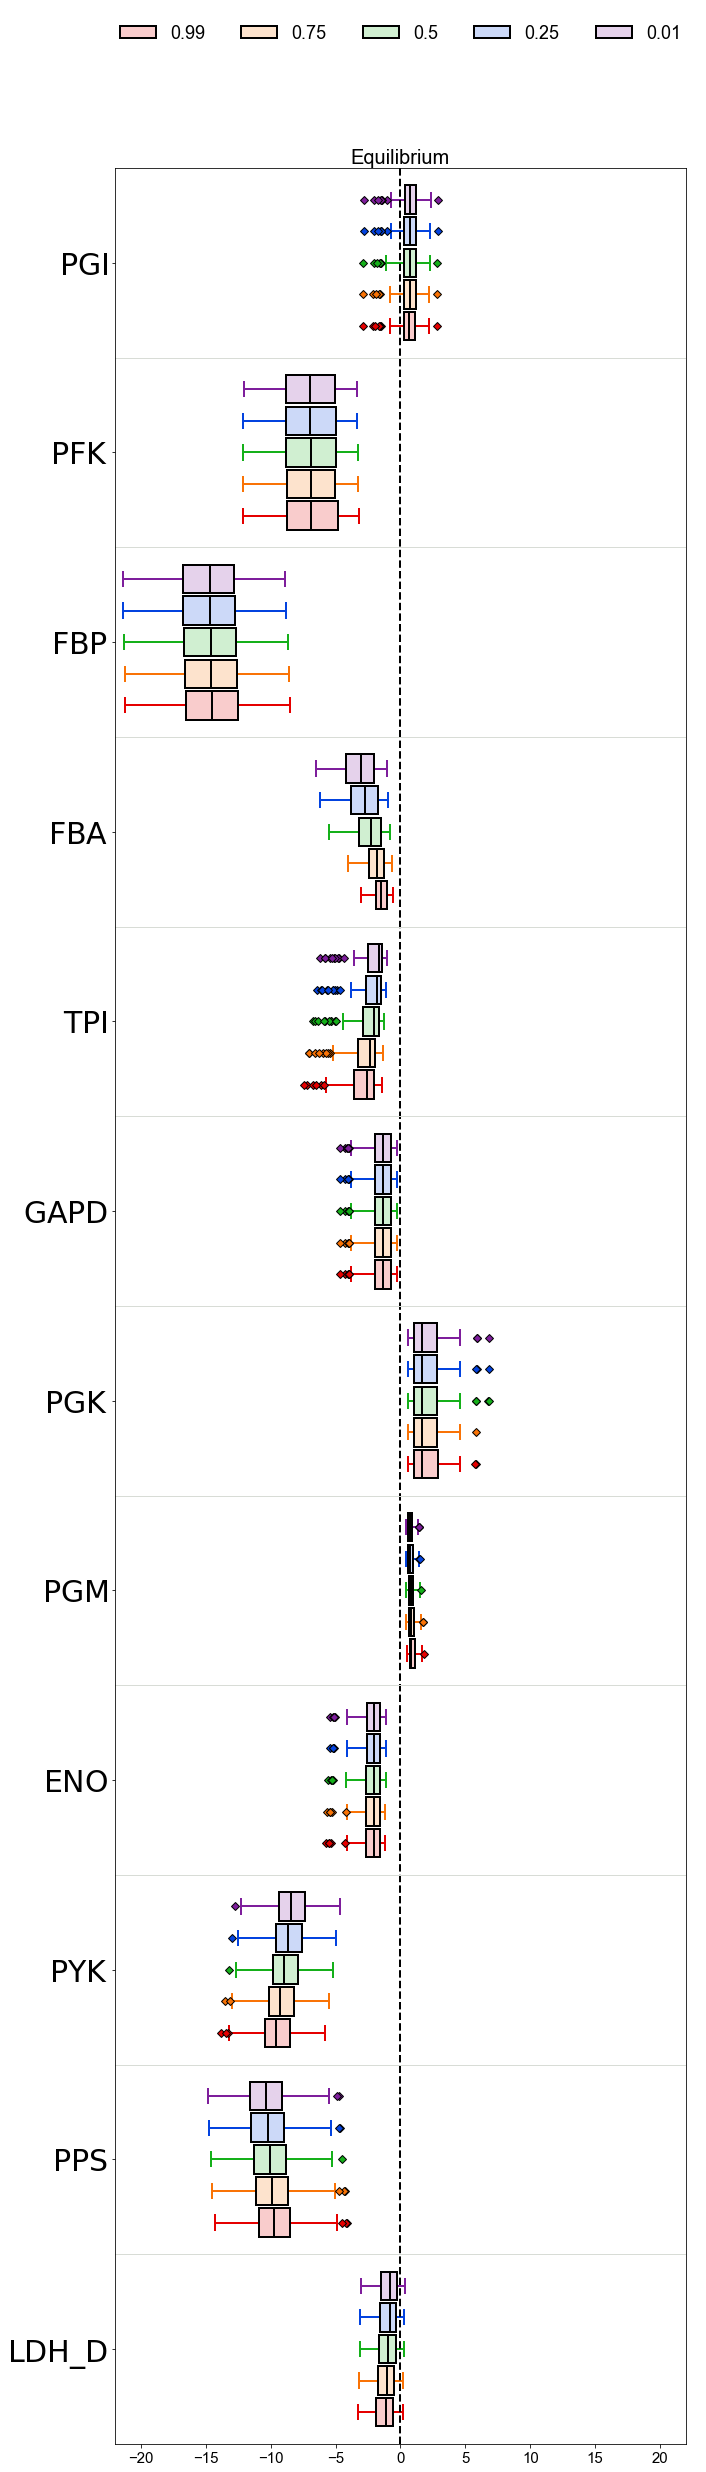

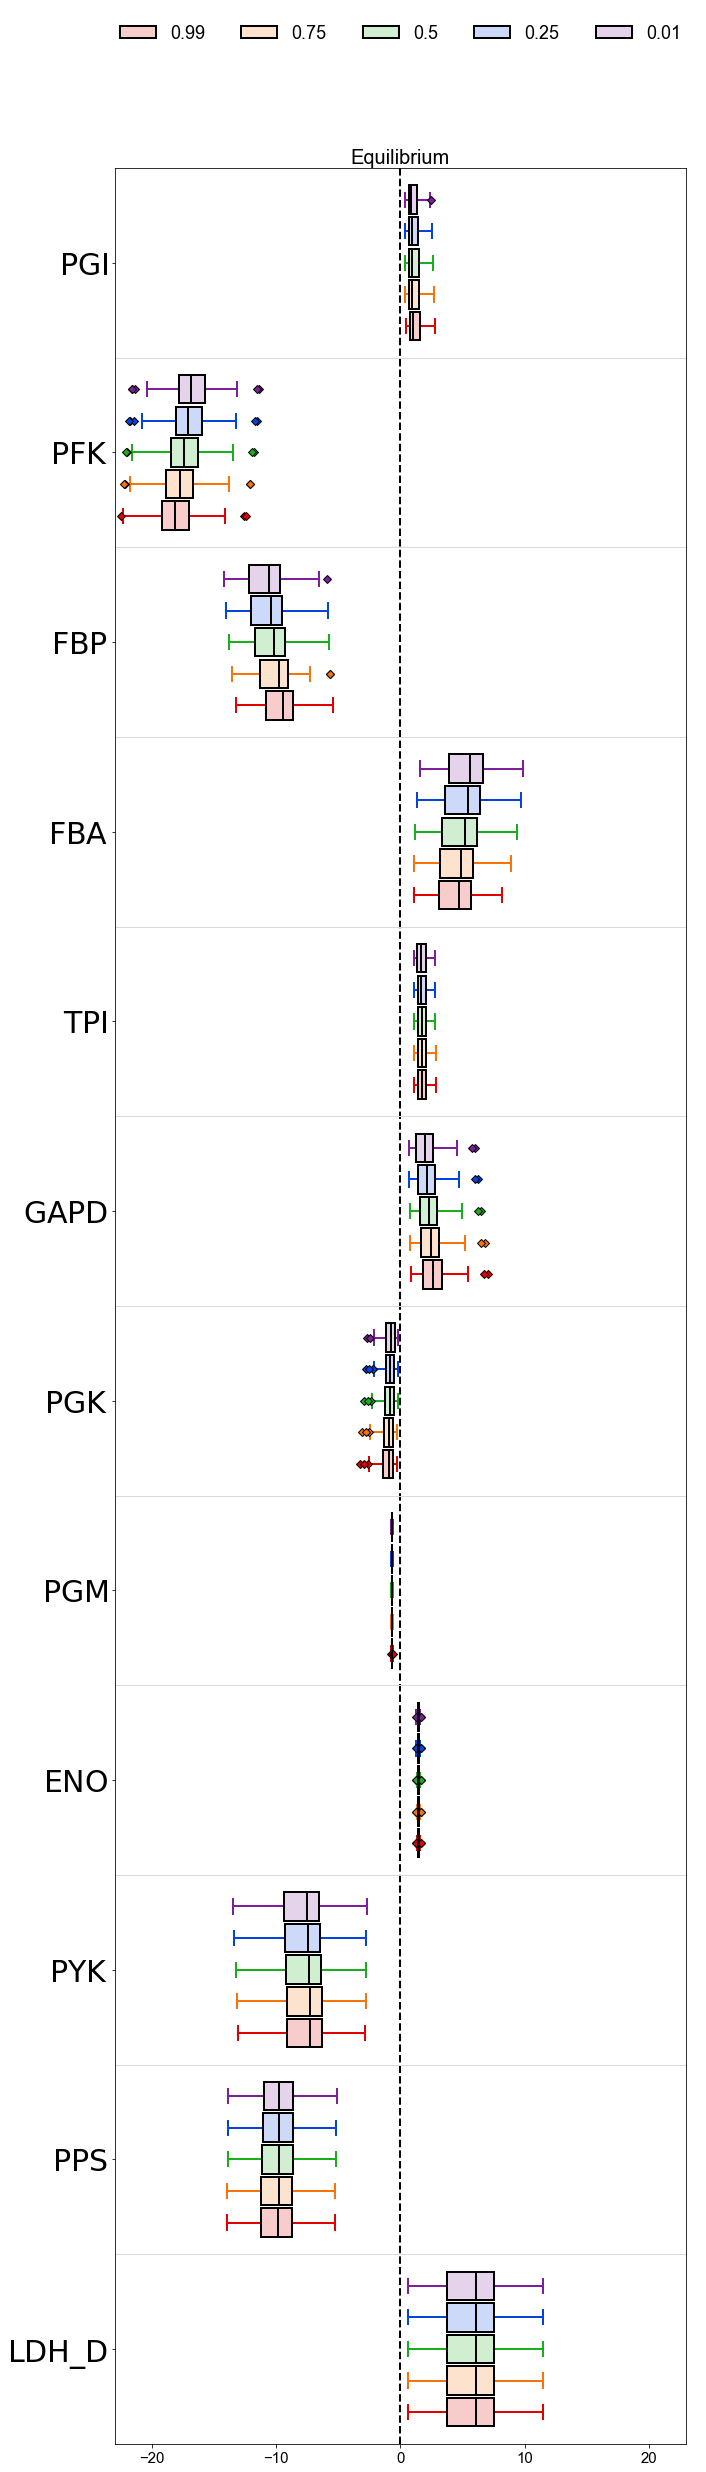

In [6]:
if not include_gibbs:
    fig_gibbs = []
    for medium, model_dict in model_dicts.items():
        fig_gibbs += [create_all_enzyme_gibbs_energy_figure(
            all_enzymes=enzyme_ids,
            model_dicts={medium: model_dict},
            isozyme_split_percentages=split_percentages,
            Keq_df=Keq_df,
            differential=False,
            flux_sensitivity=True,
            colors=colors,
            excluded_isozymes=["PFK2", "FBP2", "FBA2", "PGMi", "PYK2"],
            temperature=310.15)]
    
    if save_figures:
        for fig, medium in zip(fig_gibbs, mediums):
            save_figure("all_enzymes", "_".join(("Gibbs", medium)), fig_type, fig, svg=svg, pdf=pdf)

### Fractional abundance plots

Enzyme: PGI
Glucose
Pyruvate




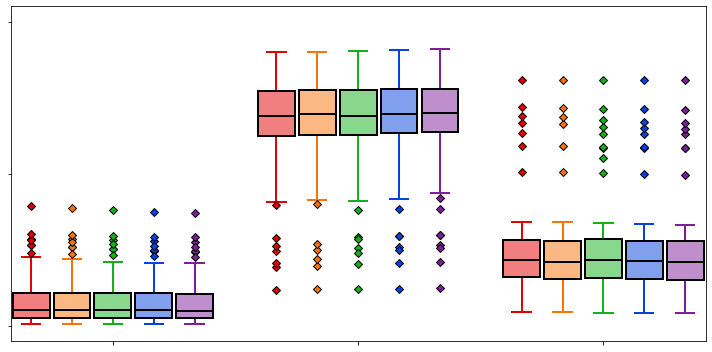

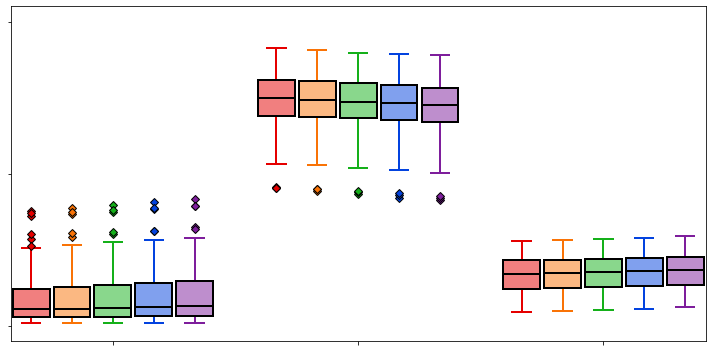

Enzyme: PFK1
Glucose
Pyruvate




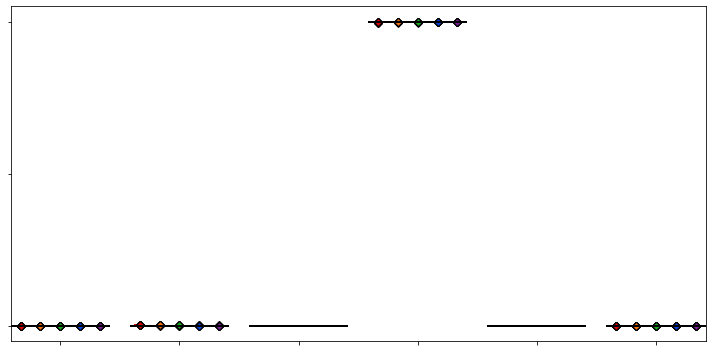

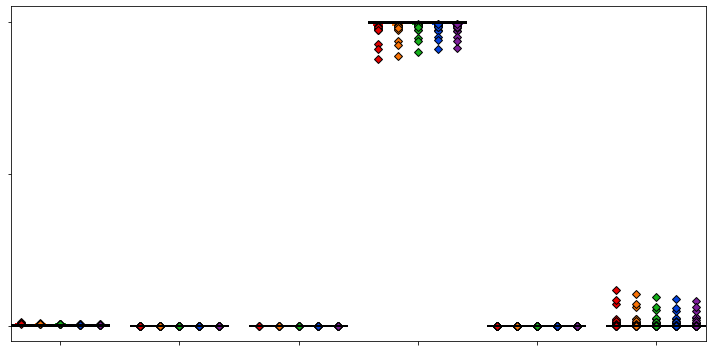

Enzyme: PFK2
Glucose
Pyruvate




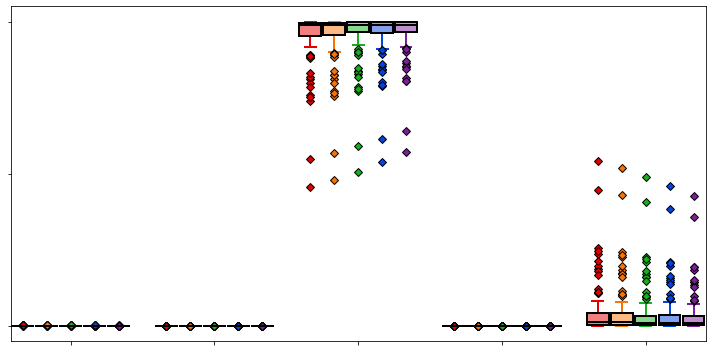

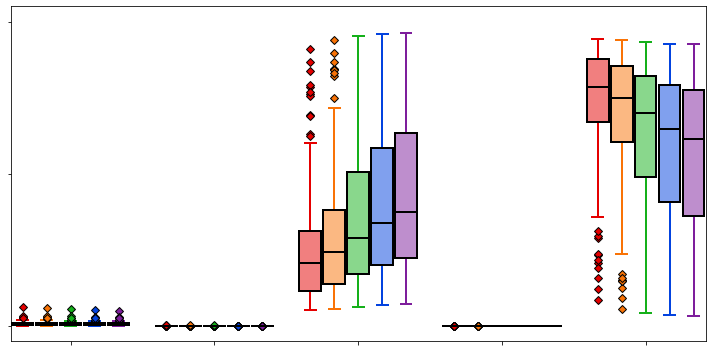

Enzyme: FBP1
Glucose
Pyruvate




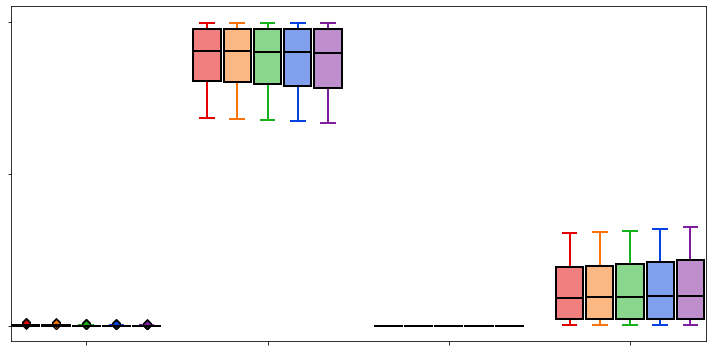

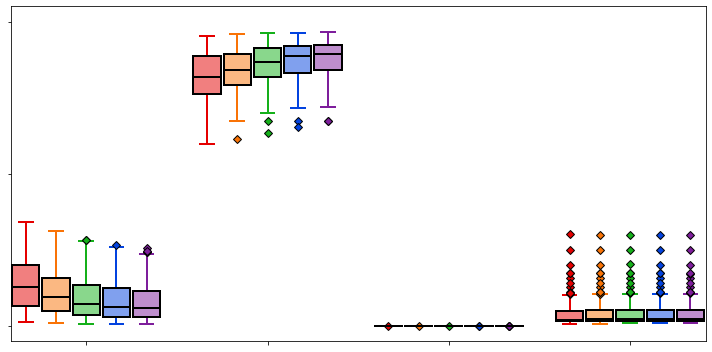

Enzyme: FBP2
Glucose
Pyruvate




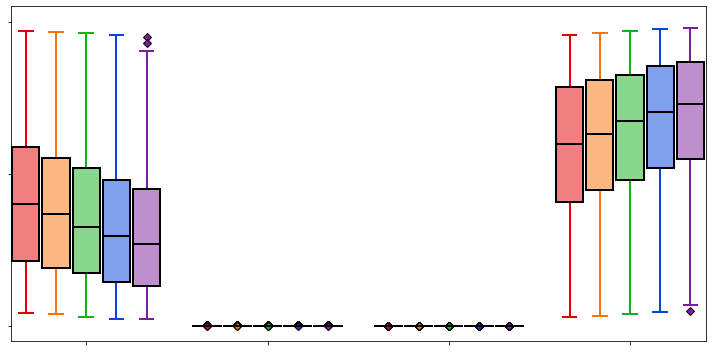

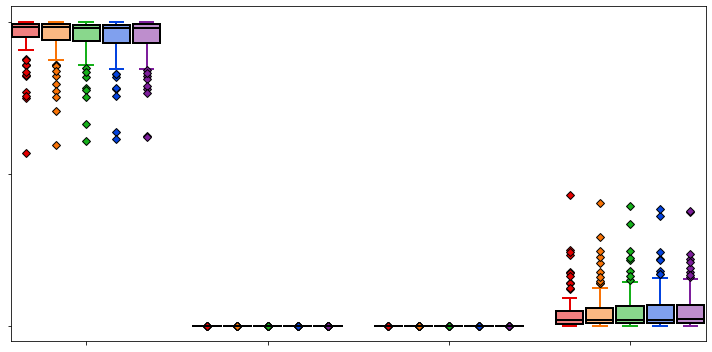

Enzyme: FBA1
Glucose
Pyruvate




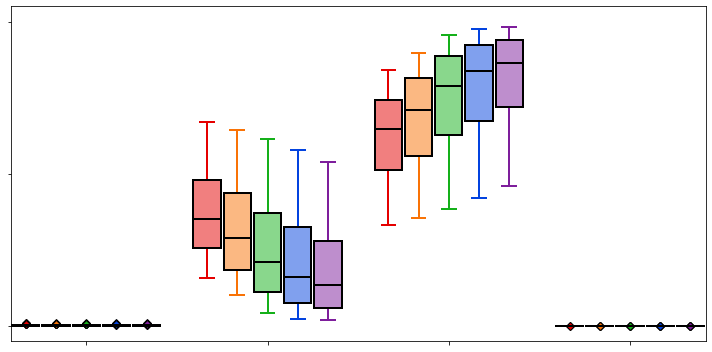

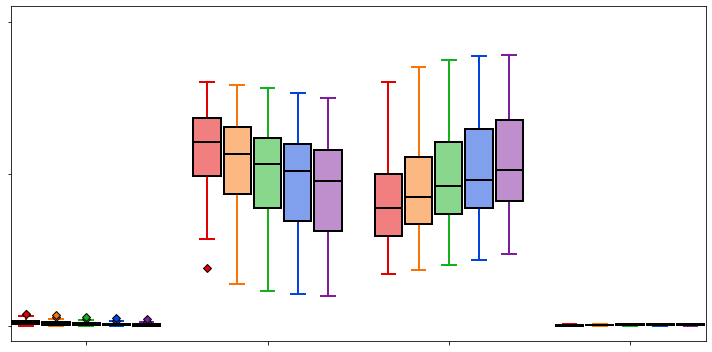

Enzyme: FBA2
Glucose
Pyruvate




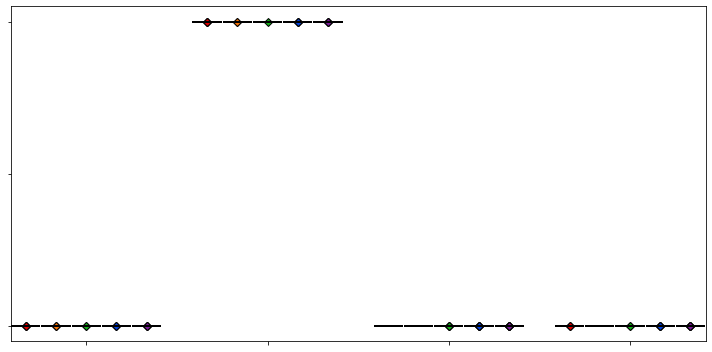

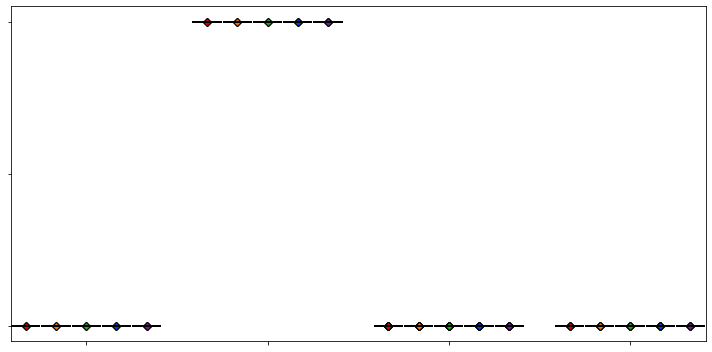

Enzyme: TPI
Glucose
Pyruvate




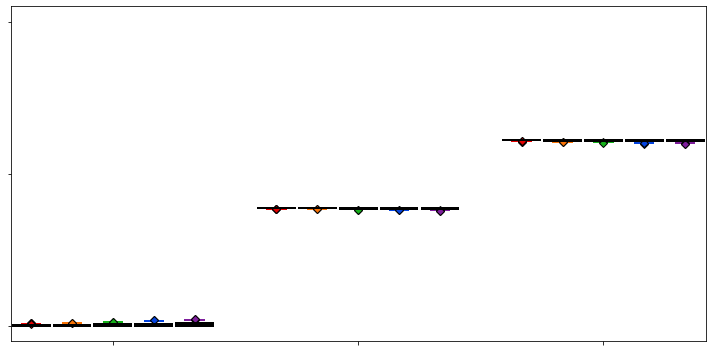

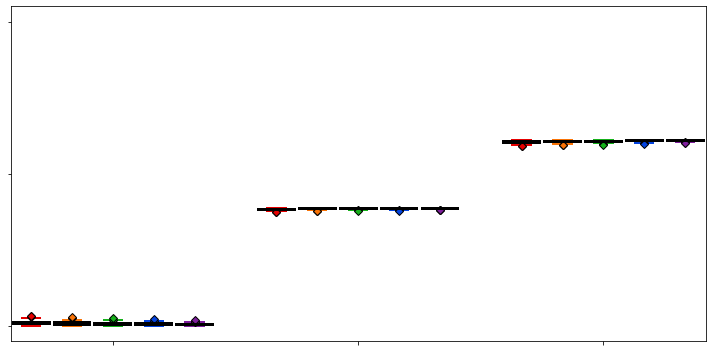

Enzyme: GAPD
Glucose
Pyruvate




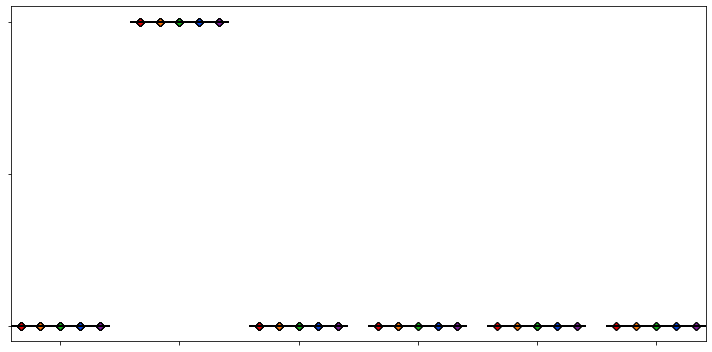

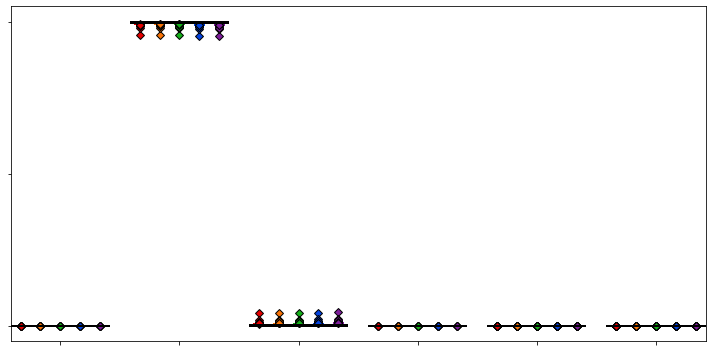

Enzyme: PGK
Glucose
Pyruvate




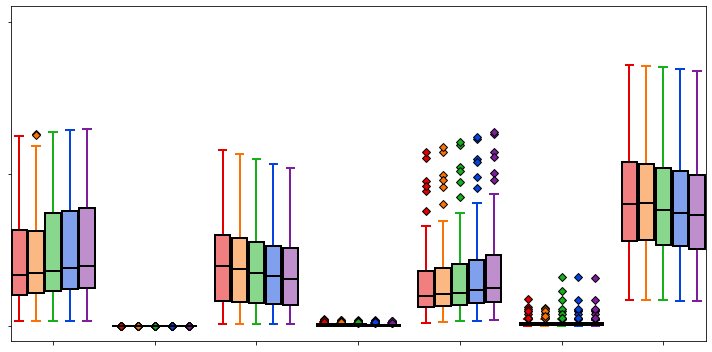

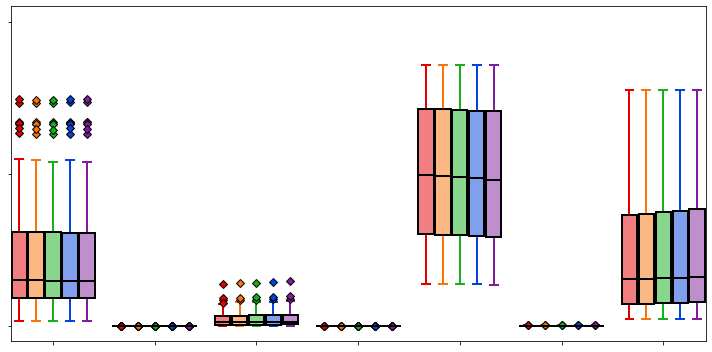

Enzyme: PGMd
Glucose
Pyruvate




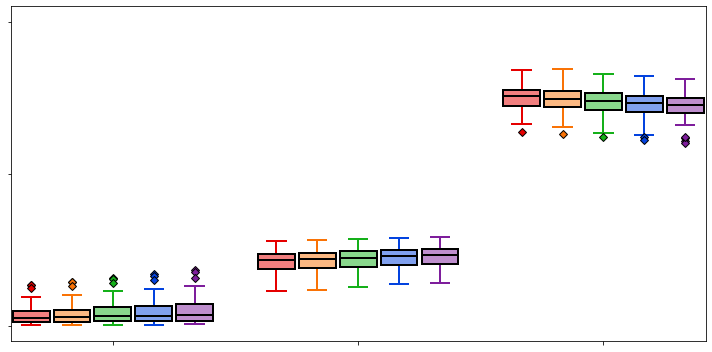

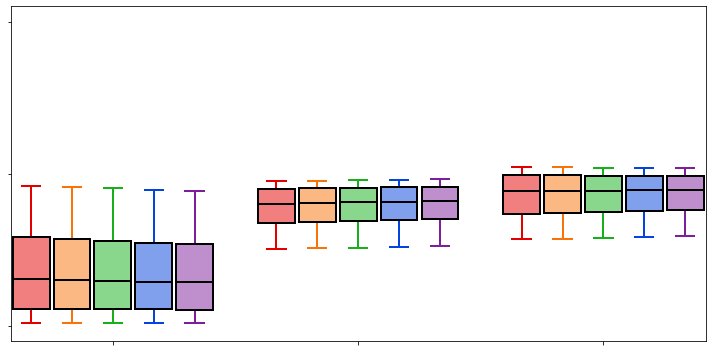

Enzyme: PGMi
Glucose
Pyruvate




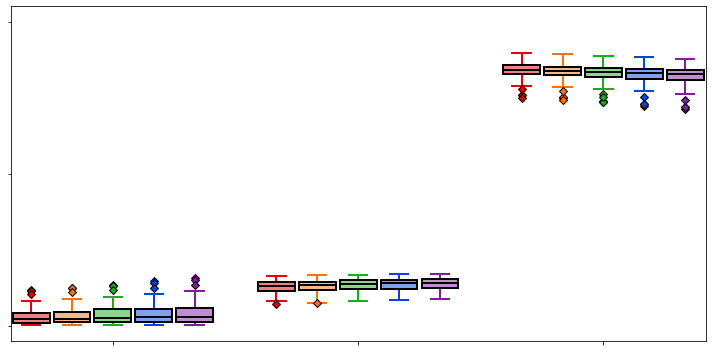

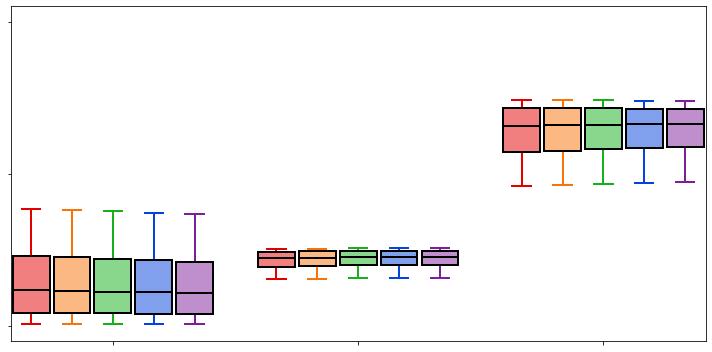

Enzyme: ENO
Glucose
Pyruvate




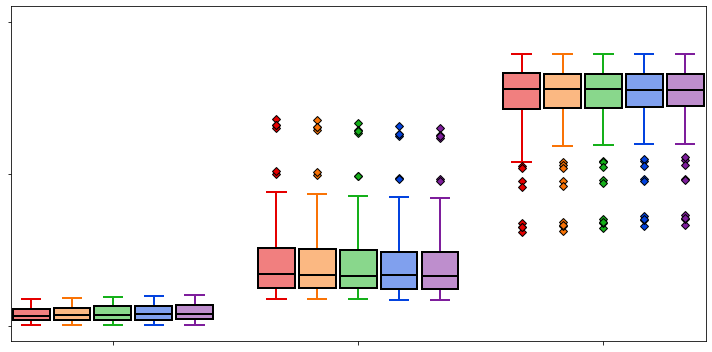

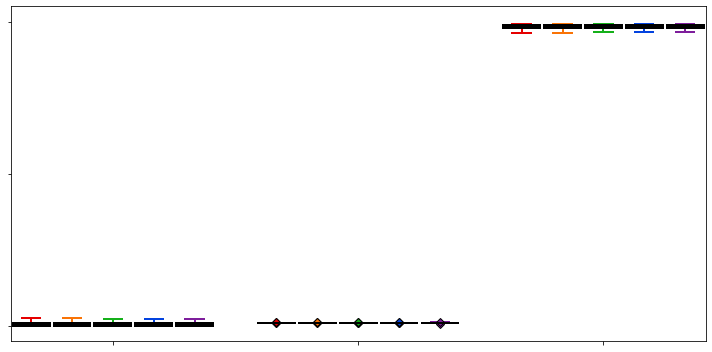

Enzyme: PYK1
Glucose
Pyruvate




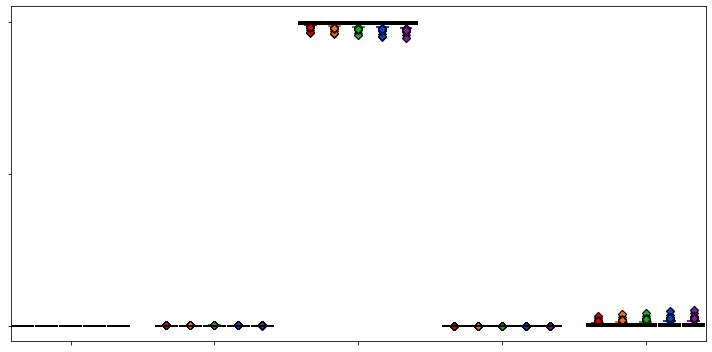

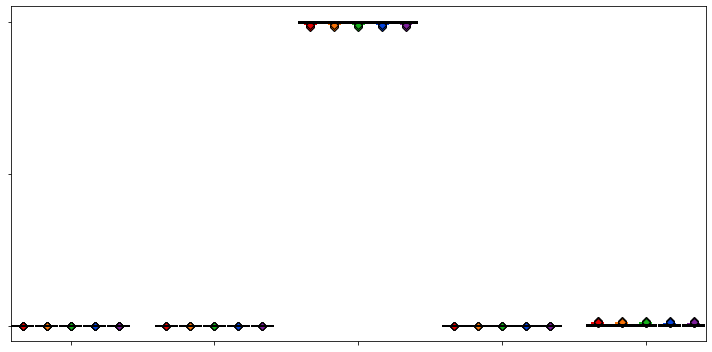

Enzyme: PYK2
Glucose
Pyruvate




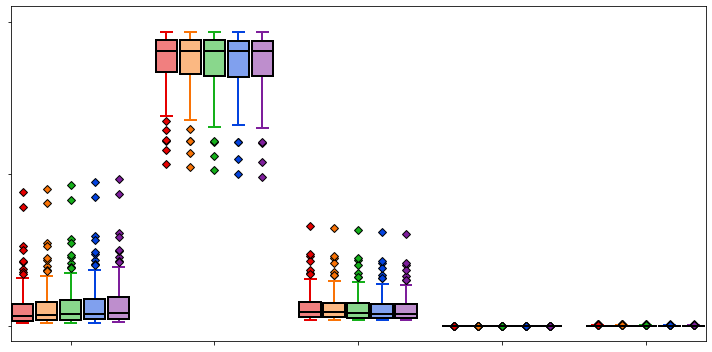

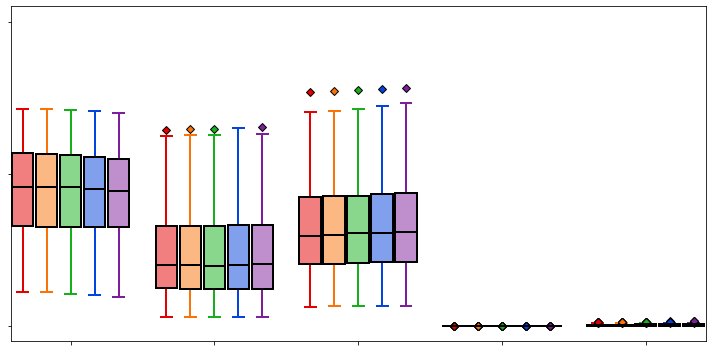

Enzyme: PPS
Glucose
Pyruvate




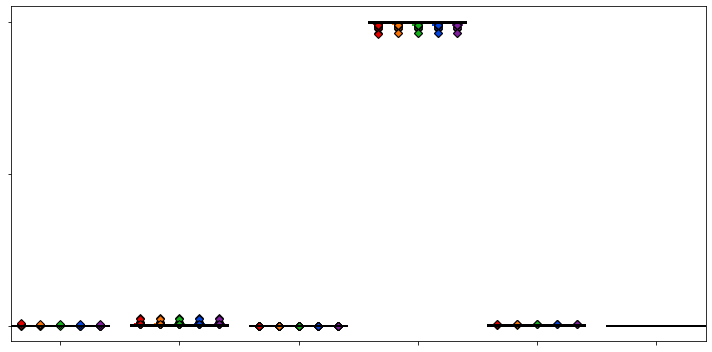

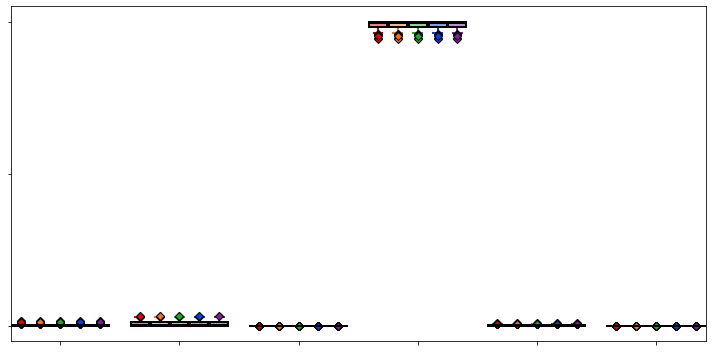

Enzyme: LDH_D
Glucose
Pyruvate




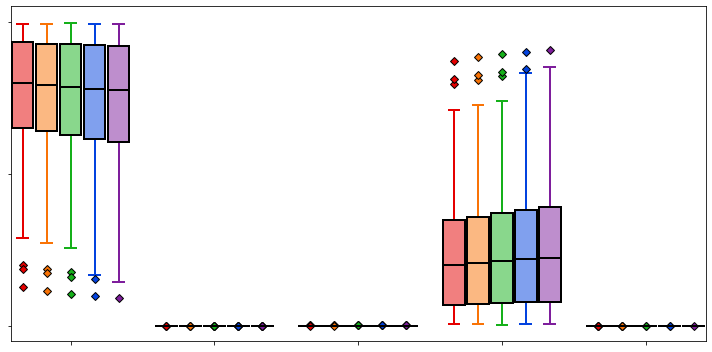

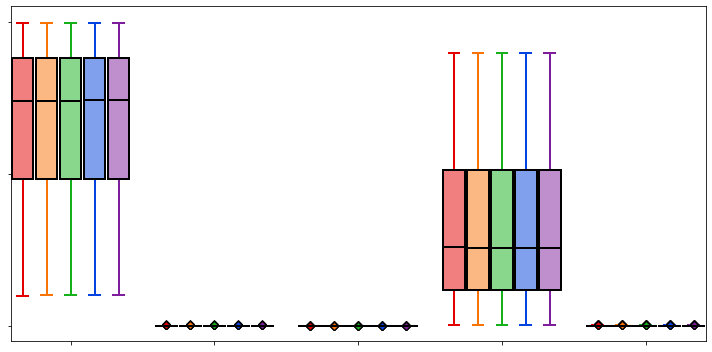

In [7]:
for enzyme_id in enzyme_ids:
    print("Enzyme: " + enzyme_id)
    if enzyme_id == "PFK1":
        groupings = group_PFK1(
            enzyme_module_dict=model_dicts.get(
                medium).get(
                    list(split_percentages)[0])[0].enzyme_modules.get_by_id(
                enzyme_id))
    else:
        groupings = None

    if individual:
        figs = create_figures_for_export(
            enzyme=enzyme_id, 
            model_dicts=model_dicts,
            isozyme_split_percentages=split_percentages,
            Keq_df=Keq_df,
            differential=False,
            include_gibbs_energy=include_gibbs,
            flux_sensitivity=True,
            groupings=groupings,
            colors=colors)
        
        for fig, medium in zip(figs, mediums):
            ax = fig.axes[0]
            fig.tight_layout(w_pad=10, h_pad=3)
        print("\n")
                

        if save_figures:
            for fig, medium in zip(figs, mediums):
                save_figure(enzyme_id, medium, fig_type, fig, svg=svg, pdf=pdf)
                
    if differential and len(mediums) == 2:
        fig_diff = create_figures_for_export(
            enzyme=enzyme_id, 
            model_dicts=model_dicts,
            isozyme_split_percentages=split_percentages,
            Keq_df=Keq_df,
            differential=True,
            include_gibbs_energy=include_gibbs,
            flux_sensitivity=True,
            groupings=groupings,
            colors=colors)[0]

        if save_figures:
            save_figure(enzyme_id, "_".join(("Diff", *mediums)), fig_type, fig_diff, svg=svg, pdf=pdf)
        
    plt.show()
    plt.close("all")

#### Steady state metabolite concentrations

In [8]:
dataframes = {}
for medium, model_dict in model_dicts.items():
    dataframes[medium] = []
    print("Growth condition: {0}".format(medium))
    for flux_split, model_ensemble in model_dict.items():
        print("Isozyme 1: {0}% , Isozyme 2: {1}%".format(*[int(100 * v) for v in [flux_split, 1 - flux_split]]))
        data = {}
        for model in model_ensemble:
            data[model.id] =  {m.id: ic for m, ic in model.initial_conditions.items()
                   if not isinstance(m, EnzymeModuleForm)}
        df = pd.DataFrame.from_dict(data).T
        df = df.describe().T.drop("count", axis=1)
        df.sort_index(inplace=True)
        df.index.name = ""
        dataframes[medium].append(df)
dataframes;

Growth condition: Glucose
Isozyme 1: 99% , Isozyme 2: 1%
Isozyme 1: 75% , Isozyme 2: 25%
Isozyme 1: 50% , Isozyme 2: 50%
Isozyme 1: 25% , Isozyme 2: 75%
Isozyme 1: 1% , Isozyme 2: 99%
Growth condition: Pyruvate
Isozyme 1: 99% , Isozyme 2: 1%
Isozyme 1: 75% , Isozyme 2: 25%
Isozyme 1: 50% , Isozyme 2: 50%
Isozyme 1: 25% , Isozyme 2: 75%
Isozyme 1: 1% , Isozyme 2: 99%


#### Steady state total enzyme concentrations

In [9]:
dataframes = {}
for medium, model_dict in model_dicts.items():
    dataframes[medium] = []
    print("Growth condition: {0}".format(medium))
    for flux_split, model_ensemble in model_dict.items():
        print("Isozyme 1: {0}% , Isozyme 2: {1}%".format(*[int(100 * v) for v in [flux_split, 1 - flux_split]]))
        data = {}
        for model in model_ensemble:
            data[model.id] =  {
                e_id: sum(model.enzyme_modules.get_by_id(e_id).enzyme_module_forms.list_attr("ic"))
                for e_id in model.enzyme_modules.list_attr("id")}
        df = pd.DataFrame.from_dict(data).T
        
#         df = df.describe().T.drop("count", axis=1)
#         df.index.name = ""
        dataframes[medium].append(df)
dataframes;

Growth condition: Glucose
Isozyme 1: 99% , Isozyme 2: 1%
Isozyme 1: 75% , Isozyme 2: 25%
Isozyme 1: 50% , Isozyme 2: 50%
Isozyme 1: 25% , Isozyme 2: 75%
Isozyme 1: 1% , Isozyme 2: 99%
Growth condition: Pyruvate
Isozyme 1: 99% , Isozyme 2: 1%
Isozyme 1: 75% , Isozyme 2: 25%
Isozyme 1: 50% , Isozyme 2: 50%
Isozyme 1: 25% , Isozyme 2: 75%
Isozyme 1: 1% , Isozyme 2: 99%
